In [1]:
#Project1 by Stat Squad

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set_style('whitegrid')

In [2]:
ds = pd.read_csv("polls_us_elections_2016.csv")

# Clusterization of States Based on Adjasted Poll Number

We will do the clusterization of the states basing on the adjasted poll number for Trump and Clinton.

The issue is to correctly cluster the data which is changing in time and also changing by pollster:
we have different pollster with different grade which provide their our results.

Let's also visualize the time periods for all the polls that were held. (TODO)

In [8]:
cluster_variables = ['state', 'pollster', 'startdate', 'enddate', 'samplesize', 'population', 'adjpoll_trump', 'adjpoll_clinton']
cluster_ds = ds[ds['state'] != 'U.S.'][cluster_variables]

cluster_ds

,state,pollster,startdate,enddate,samplesize,population,adjpoll_trump,adjpoll_clinton
8,New Mexico,Zia Poll,2016-11-06,2016-11-06,8439.0,lv,41.59978,44.82594
13,Virginia,Public Policy Polling,2016-11-03,2016-11-04,1238.0,lv,42.32751,47.43805
15,Iowa,Selzer & Company,2016-11-01,2016-11-04,800.0,lv,45.66917,39.37561
17,Wisconsin,Marquette University,2016-10-26,2016-10-31,1255.0,lv,40.97982,46.10344
18,North Carolina,Siena College,2016-11-04,2016-11-06,800.0,lv,45.08290,44.21875
...,...,...,...,...,...,...,...,...
4203,Virginia,Ipsos,2016-09-16,2016-09-22,452.0,lv,40.48017,46.47852
4204,Wisconsin,Marquette University,2016-08-04,2016-08-07,683.0,lv,39.07778,48.74781
4205,Utah,Google Consumer Surveys,2016-11-01,2016-11-07,286.0,lv,40.57738,26.65200
4206,Oregon,Ipsos,2016-10-21,2016-11-02,446.0,lv,37.10720,45.12949


The polls that were conducted later (closer to the date of election) should provide more impactful data, as they tell us
the more definite position of the population (i.e. asking the population 2 years before the election and a week before may give us significantly different results).

## Toy-model with Averaged Poll Number by Date and Pollster

Let's take simple average over all dates and pollsters to quickly apply the mechanism and see what do we use.

This toy-model will also show us whether this averaging actually works.

In [11]:
all_cluster_ds = cluster_ds[['state', 'adjpoll_trump', 'adjpoll_clinton']].groupby('state', dropna=True).mean()

all_cluster_ds.head()

,adjpoll_trump,adjpoll_clinton
state,,
Alabama,57.394897,33.239177
Alaska,44.935353,35.584879
Arizona,44.423298,42.152969
Arkansas,51.693966,36.431345
California,32.492010,55.302468


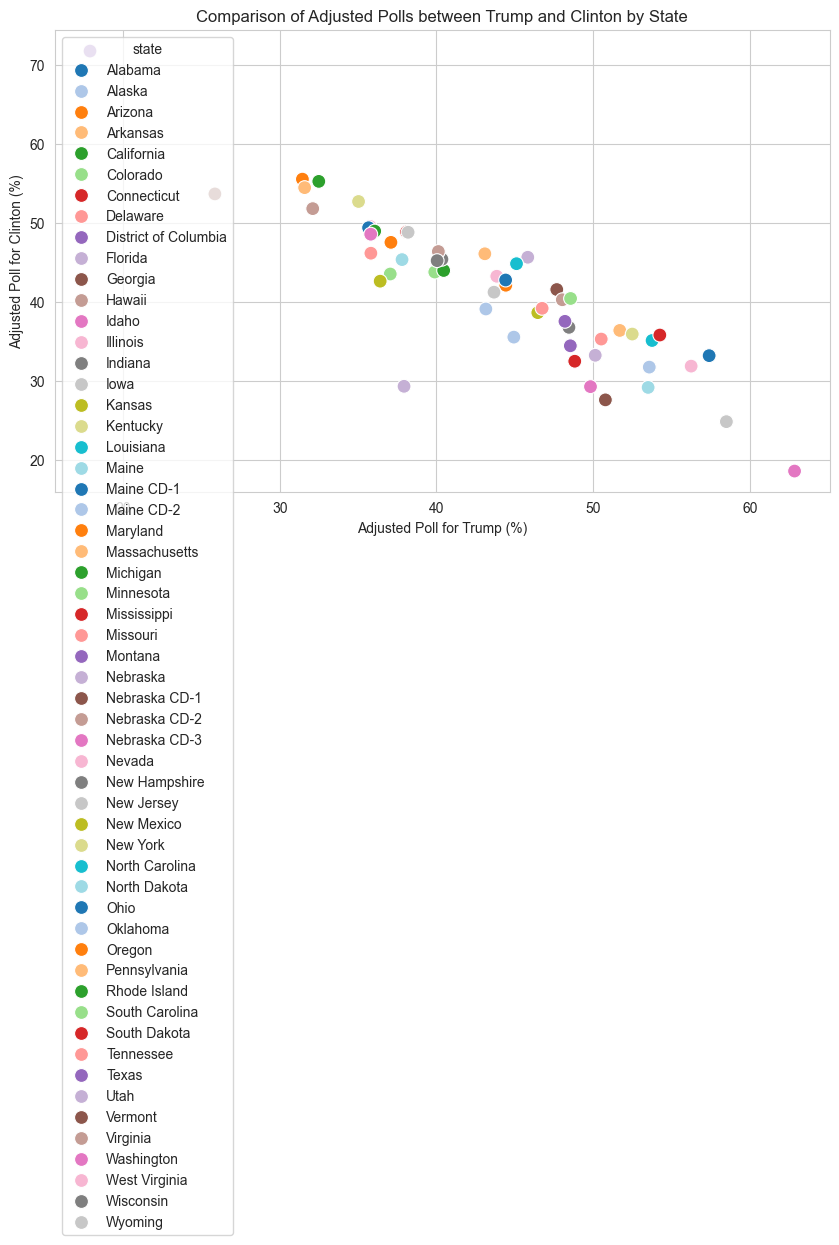

In [15]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=all_cluster_ds, x="adjpoll_trump", y="adjpoll_clinton", hue="state", palette="tab20", s=100)

plt.xlabel("Adjusted Poll for Trump (%)")
plt.ylabel("Adjusted Poll for Clinton (%)")
plt.title("Comparison of Adjusted Polls between Trump and Clinton by State")

# plt.tight_layout()
plt.show()

In [16]:
state_preds = KMeans(n_clusters=3).fit_predict(all_cluster_ds[['adjpoll_trump', 'adjpoll_clinton']])

all_cluster_ds['Cluster'] = state_preds

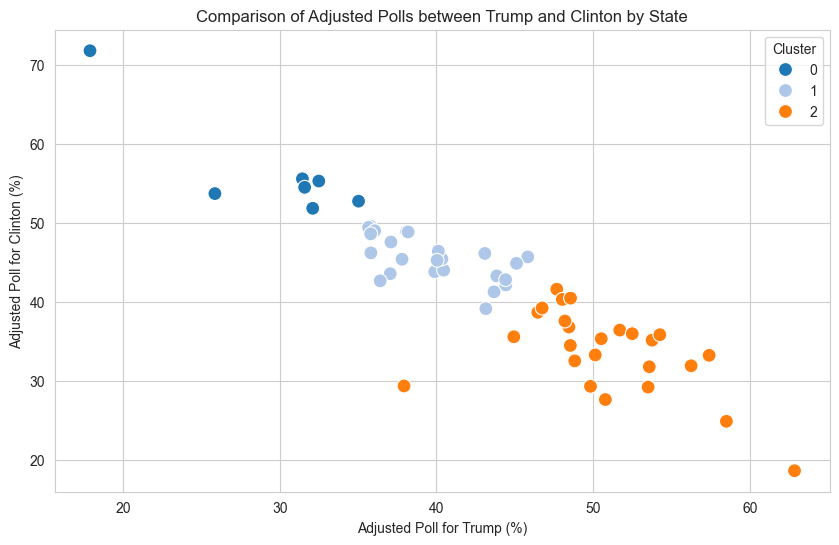

In [17]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=all_cluster_ds, x="adjpoll_trump", y="adjpoll_clinton", hue="Cluster", palette="tab20", s=100)

plt.xlabel("Adjusted Poll for Trump (%)")
plt.ylabel("Adjusted Poll for Clinton (%)")
plt.title("Comparison of Adjusted Polls between Trump and Clinton by State")

# plt.tight_layout()
plt.show()